In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/china-cancer-patient-records/china_cancer_patients_synthetic.csv


# **Data Preprocessing**

In [2]:
df = pd.read_csv('/kaggle/input/china-cancer-patient-records/china_cancer_patients_synthetic.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths      

In [3]:
print(df.head(10))

   PatientID  Gender  Age   Province Ethnicity TumorType CancerStage  \
0  CHN-00001    Male   32      Hunan       Han      Lung           I   
1  CHN-00002    Male   66    Sichuan       Han      Lung          IV   
2  CHN-00003   Other   26  Guangdong       Han      Lung         III   
3  CHN-00004   Other   35      Anhui    Uyghur    Breast         III   
4  CHN-00005    Male   32  Guangdong       Han   Stomach          II   
5  CHN-00006    Male   40      Hebei       Han     Liver          II   
6  CHN-00007    Male   32  Guangdong       Han      Lung          IV   
7  CHN-00008   Other   23    Sichuan       Han   Stomach          IV   
8  CHN-00009  Female   54      Hunan       Han      Lung           I   
9  CHN-00010   Other   76    Jiangsu       Han      Lung          II   

  DiagnosisDate  TumorSize Metastasis     TreatmentType SurgeryDate  \
0    2010-07-24        8.2         No         Radiation  2010-08-24   
1    2015-01-03        9.5        Yes      Chemotherapy  2015-03-

In [4]:
print(df.describe())

                Age     TumorSize  ChemotherapySessions  RadiationSessions  \
count  10000.000000  10000.000000            10000.0000       10000.000000   
mean      51.600200      6.339040                3.9990           3.046400   
std       19.705608      2.234999                6.2036           7.301505   
min       18.000000      0.500000                0.0000           0.000000   
25%       35.000000      4.800000                0.0000           0.000000   
50%       51.000000      6.400000                0.0000           0.000000   
75%       69.000000      7.900000                8.0000           0.000000   
max       85.000000     14.200000               20.0000          30.000000   

       FollowUpMonths  
count    10000.000000  
mean        30.432800  
std         17.162545  
min          1.000000  
25%         16.000000  
50%         31.000000  
75%         45.000000  
max         60.000000  


**Cek Missing-Value**

In [5]:
df.isnull().sum()

PatientID                  0
Gender                     0
Age                        0
Province                   0
Ethnicity                  0
TumorType                  0
CancerStage                0
DiagnosisDate              0
TumorSize                  0
Metastasis                 0
TreatmentType              0
SurgeryDate             5673
ChemotherapySessions       0
RadiationSessions          0
SurvivalStatus             0
FollowUpMonths             0
SmokingStatus              0
AlcoholUse              5921
GeneticMutation         7200
Comorbidities           3715
dtype: int64

**Mengubah data datetime dan mengganti Misiing Value menjadi Unknown**

In [6]:
# Convert dates
df['DiagnosisDate'] = pd.to_datetime(df['DiagnosisDate'], errors='coerce')
df['SurgeryDate'] = pd.to_datetime(df['SurgeryDate'], errors='coerce')

# Fill missing values temporarily for analysis
df['GeneticMutation'] = df['GeneticMutation'].fillna('Unknown')
df['Comorbidities'] = df['Comorbidities'].fillna('Unknown')
df['AlcoholUse'] = df['AlcoholUse'].fillna('Unknown')

> **Hapus kolom SugeryDate karena informasi sangat opsional banyak pasien yang tidak dioperasi**

In [7]:
df['HadSurgery'] = df['SurgeryDate'].notnull().astype(int)
df.drop('SurgeryDate', axis=1, inplace=True)

In [8]:
df.isnull().sum()

PatientID               0
Gender                  0
Age                     0
Province                0
Ethnicity               0
TumorType               0
CancerStage             0
DiagnosisDate           0
TumorSize               0
Metastasis              0
TreatmentType           0
ChemotherapySessions    0
RadiationSessions       0
SurvivalStatus          0
FollowUpMonths          0
SmokingStatus           0
AlcoholUse              0
GeneticMutation         0
Comorbidities           0
HadSurgery              0
dtype: int64

> **Cek Variabel yang telah diganti dengan Unknown**

In [9]:
print(df['AlcoholUse'].value_counts())

AlcoholUse
Unknown       5921
Occasional    3127
Heavy          952
Name: count, dtype: int64


In [10]:
print(df['Comorbidities'].value_counts())

Comorbidities
Unknown                      3715
Hypertension                 1514
Diabetes                     1506
Hepatitis B                  1464
Hypertension, Hepatitis B     327
Hepatitis B, Diabetes         319
Diabetes, Hypertension        301
Hepatitis B, Hypertension     296
Diabetes, Hepatitis B         294
Hypertension, Diabetes        264
Name: count, dtype: int64


In [11]:
print(df['GeneticMutation'].value_counts())

GeneticMutation
Unknown    7200
EGFR       1389
KRAS        955
BRCA1       456
Name: count, dtype: int64


**kolom Metastatis akan digunakan sebagai fitur utama untuk menjalankan model**

In [12]:
print(df['Metastasis'].value_counts())

Metastasis
No     7301
Yes    2699
Name: count, dtype: int64


**Encoding menggunakan manual mapping** 

In [13]:
stage_order = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['CancerStage'] = df['CancerStage'].map(stage_order)

**Encoding menggunakan One-Hot-Encoding**

In [14]:
df['SurvivalStatus'] = df['SurvivalStatus'].map({'Alive': 1, 'Deceased': 0})

In [15]:
df = pd.get_dummies(df, columns=[
    'Gender', 'Province', 'Ethnicity', 'TumorType',
    'Metastasis', 'TreatmentType', 'SmokingStatus',
    'AlcoholUse', 'GeneticMutation'
])

**Encoding menggunakan Multilabel Binarizer**

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

# Pisahkan string jadi list
df['Comorbidities'] = df['Comorbidities'].apply(lambda x: [c.strip() for c in x.split(',')])

# Terapkan MultiLabelBinarizer
mlb = MultiLabelBinarizer()
comorbid_df = pd.DataFrame(mlb.fit_transform(df['Comorbidities']), columns=mlb.classes_)

# Gabung ke data utama dan hapus kolom asli
df = pd.concat([df.drop('Comorbidities', axis=1), comorbid_df], axis=1)

In [17]:
df = df.drop(['PatientID','DiagnosisDate'], axis=1)

# **Feature Scalling**

In [18]:
X = df.drop('SurvivalStatus', axis=1)
y = df['SurvivalStatus']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-test Split**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set: (8000, 56) (8000,)
Test set : (2000, 56) (2000,)


# **Modeling menggunakan SVM(Support Vector Machine)**

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7885
Confusion Matrix:
 [[ 194  248]
 [ 175 1383]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.44      0.48       442
           1       0.85      0.89      0.87      1558

    accuracy                           0.79      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.78      0.79      0.78      2000



> **Menggunakan Parameter class weight balance untuk menyeimbangkang variabel data pada fitur target**

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7625
Confusion Matrix:
 [[ 398   44]
 [ 431 1127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.90      0.63       442
           1       0.96      0.72      0.83      1558

    accuracy                           0.76      2000
   macro avg       0.72      0.81      0.73      2000
weighted avg       0.86      0.76      0.78      2000



**Analisis**
* Kelas 0 (Tidak Bertahan) punya precision yang rendah (0.48) dan recall tinggi (0.90).
* Model cenderung lebih sering memprediksi class 1 karena data tidak seimbang (1558 vs 442).
* Hal ini menyebabkan model sering salah memprediksi class 0 sebagai class 1 (FN tinggi: 431).

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.769
Confusion Matrix:
 [[ 442    0]
 [ 462 1096]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       442
           1       1.00      0.70      0.83      1558

    accuracy                           0.77      2000
   macro avg       0.74      0.85      0.74      2000
weighted avg       0.89      0.77      0.79      2000



**Analisis setelah menggunakan linear dan nalance**
* Model sekarang tidak bias terhadap kelas mayoritas (Class 1) ini efek dari class_weight='balanced'.
* Akurasi naik, tapi yang lebih penting distribusi performa antar kelas lebih adil.
* Recall untuk Class 0 (yang semula jadi korban) meningkat drastis dari 0.90 ➜ 1.00 (artinya, tidak ada lagi Class 0 yang terlewat).

# **Tuning HyperParameter untuk model SVM(Support Vector Machine)**

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import uniform

# Buat distribusi parameter untuk dicoba secara acak
param_dist = {
    'C': uniform(loc=0.1, scale=10),  # C dari 0.1 sampai 10.1
    'kernel': ['linear'],
    'class_weight': ['balanced']
}

# Inisialisasi model
svc = SVC()

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=10,                # jumlah kombinasi acak yang diuji
    scoring='f1_weighted',    # bisa diganti jadi 'accuracy' kalau lebih fokus ke itu
    cv=3,                     # 3-fold cross-validation untuk efisiensi
    verbose=1,                # tampilkan proses
    random_state=42,
    n_jobs=-1                 # gunakan semua core CPU
)

# Lakukan tuning
random_search.fit(X_train, y_train)

# Evaluasi hasil terbaik
print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi performa
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 3.845401188473625, 'class_weight': 'balanced', 'kernel': 'linear'}
Accuracy: 0.769
Confusion Matrix:
 [[ 442    0]
 [ 462 1096]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       442
           1       1.00      0.70      0.83      1558

    accuracy                           0.77      2000
   macro avg       0.74      0.85      0.74      2000
weighted avg       0.89      0.77      0.79      2000



**Analisis setelah menggunakan Tuning HyperParameter untuk model SVM**
* tuning tidak menemukan kombinasi yang lebih baik dari apa yang sudah kamu tetapkan secara manual sebelumnya karena menggunakan RandomizedSearchCV
* Parameter space terbatask kaena hanya mengizinkan kernel='linear' dan class_weight='balanced', jadi variasinya kecil.
* Model mungkin sudah mencapai batas optimal untuk data ini dengan SVM linear.
* SVM linear dengan class_weight='balanced' memang efektif tapi recall kelas mayoritas (kelas 1) masih bisa ditingkatkan dengan model lain.

# **Modeling menggunakan Random Forest Classifier**

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.777
Confusion Matrix:
 [[ 159  283]
 [ 163 1395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.36      0.42       442
           1       0.83      0.90      0.86      1558

    accuracy                           0.78      2000
   macro avg       0.66      0.63      0.64      2000
weighted avg       0.76      0.78      0.76      2000



**Analisis model Random Forest Classifie**
* Accuracy sebesar 77.7% menunjukkan model cukup baik dalam memprediksi keseluruhan kasus.
* Recall untuk Class 1 (pasien yang bertahan/hidup/detect positif) cukup tinggi (90%), artinya model mampu menangkap sebagian besar pasien positif dengan benar.
* Namun, Recall untuk Class 0 (pasien negatif/meninggal/detect negatif) sangat rendah (36%), menunjukkan model kurang sensitif mendeteksi kasus negatif. Hal ini bisa berisiko jika tujuan utama adalah mengidentifikasi pasien negatif dengan tepat.
* Precision untuk Class 0 dan Class 1 relatif moderat, artinya dari prediksi positif masing-masing kelas, model cukup akurat.
* F1-Score yang menggabungkan precision dan recall menunjukkan keseimbangan lebih baik pada Class 1 dibanding Class 0.
  
**Implikasi**
* Model ini lebih cocok dipakai jika prioritasnya adalah meminimalkan False Negative pada Class 1, seperti memastikan pasien yang benar-benar positif tidak terlewat.
* Namun perlu perbaikan jika keseimbangan deteksi pada kedua kelas diperlukan, misalnya dengan strategi tuning hyperparameter, sampling ulang, atau model lain.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definisikan parameter yang akan dicari
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': None}
Accuracy: 0.773
Confusion Matrix:
 [[ 114  328]
 [ 126 1432]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.26      0.33       442
           1       0.81      0.92      0.86      1558

    accuracy                           0.77      2000
   macro avg       0.64      0.59      0.60      2000
weighted avg       0.74      0.77      0.75      2000



**Analisis Hasil Model Random Forest setelah Hyperparameter Tuning**
* Akurasi keseluruhan 77.3%, menunjukkan model mampu memprediksi dengan cukup baik.
* Model memiliki recall yang tinggi pada kelas 1 (92%), artinya model sangat baik dalam mengidentifikasi pasien dengan kelas positif (misal pasien yang bertahan hidup atau memiliki kondisi tertentu, tergantung label).
* Namun, untuk kelas 0 (misal pasien yang tidak bertahan atau kondisi negatif), recall rendah (26%) dan precision juga rendah (47%), yang berarti model kesulitan mengidentifikasi kelas minoritas dengan baik.
* Ketidakseimbangan kelas tampak signifikan dan perlu diperhatikan, karena model cenderung lebih fokus pada kelas mayoritas.
* Penggunaan hyperparameter tuning memperbaiki performa model dibanding default, meskipun tantangan pada kelas minoritas masih perlu penanganan lebih lanjut.

Random Forest Confusion Matrix


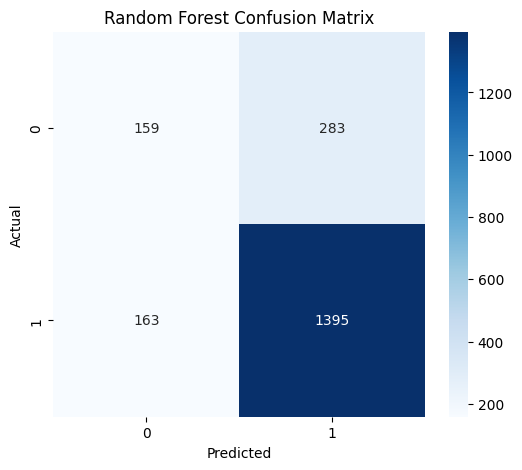

Random Forest ROC Curve


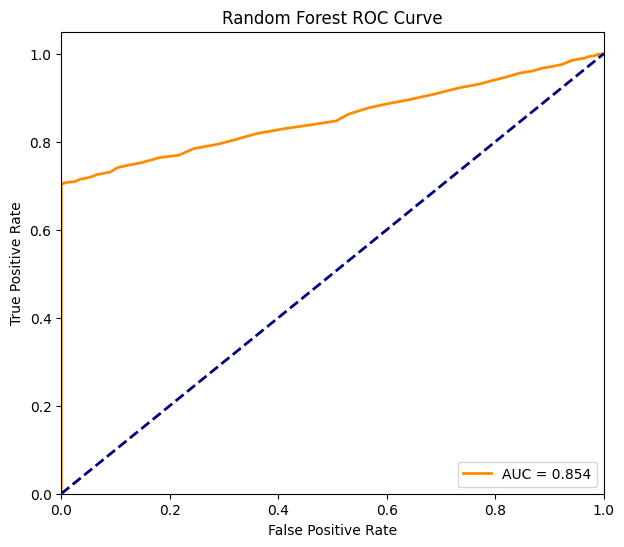

SVM Confusion Matrix


NameError: name 'svm_model' is not defined

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(model, X_test, y_test, title='ROC Curve'):
    # Binarize labels for ROC curve (needed for binary classification)
    y_bin = label_binarize(y_test, classes=[0,1])
    
    # Predicted probabilities
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        # For SVM without predict_proba, use decision_function
        y_score = model.decision_function(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Misal model dan data sudah ada: 
# rf_model, svm_model (hasil tuning), X_test_scaled, y_test

# Visualisasi Random Forest
print("Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, rf_model.predict(X_test), title='Random Forest Confusion Matrix')

print("Random Forest ROC Curve")
plot_roc_curve(rf_model, X_test, y_test, title='Random Forest ROC Curve')

# Visualisasi SVM
print("SVM Confusion Matrix")
plot_confusion_matrix(y_test, svm_model.predict(X_test), title='SVM Confusion Matrix')

print("SVM ROC Curve")
plot_roc_curve(svm_model, X_test, y_test, title='SVM ROC Curve')
